# Introduction to programming

* Introduction and talking about programming
* Installing Python (Windows, OSX, Linux)
* Virtual Environments
* Jupyter Notebook
* Typing in first program
* Debugging

## Types of programming languages:

Programming languages fall into two broad categories
* Compiled
* Interpreted

Here are some approaches to programming and programming languages
* __Procedural__: programs are a list of steps that tell a program what to do with the inputs (C, Fortran, Cobol).
* __Declarative__: the programmer describes the problem to be solved and the language decides how to implement a solution (SQL, Prolog, Lisp).
* __Object-Oriented__: programs are organized into objects, which maintain an internal state (C++, Java, C#).
* __Functional__: programs are organized into functions that take an input and produce an output. The functions have no internal state (Haskell, OCaml).

## Install Python
* Package Manager
* Download from python.org
* uv
* conda

### Windows
* Microsoft Store
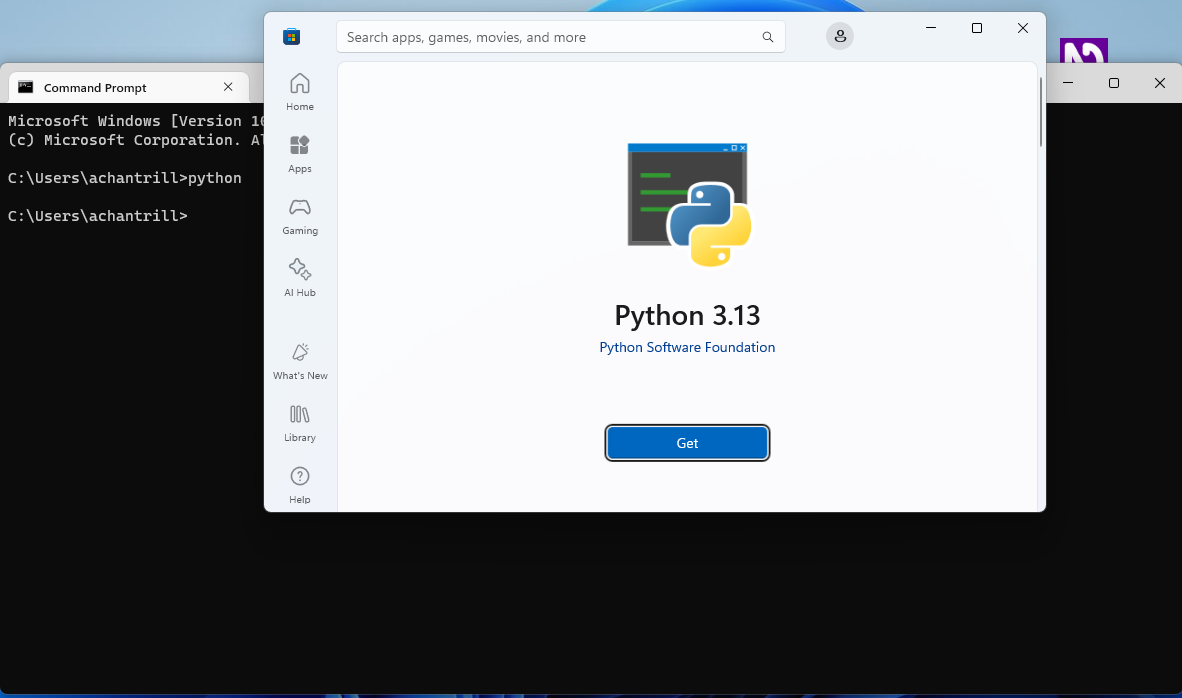
* Download from Python.org
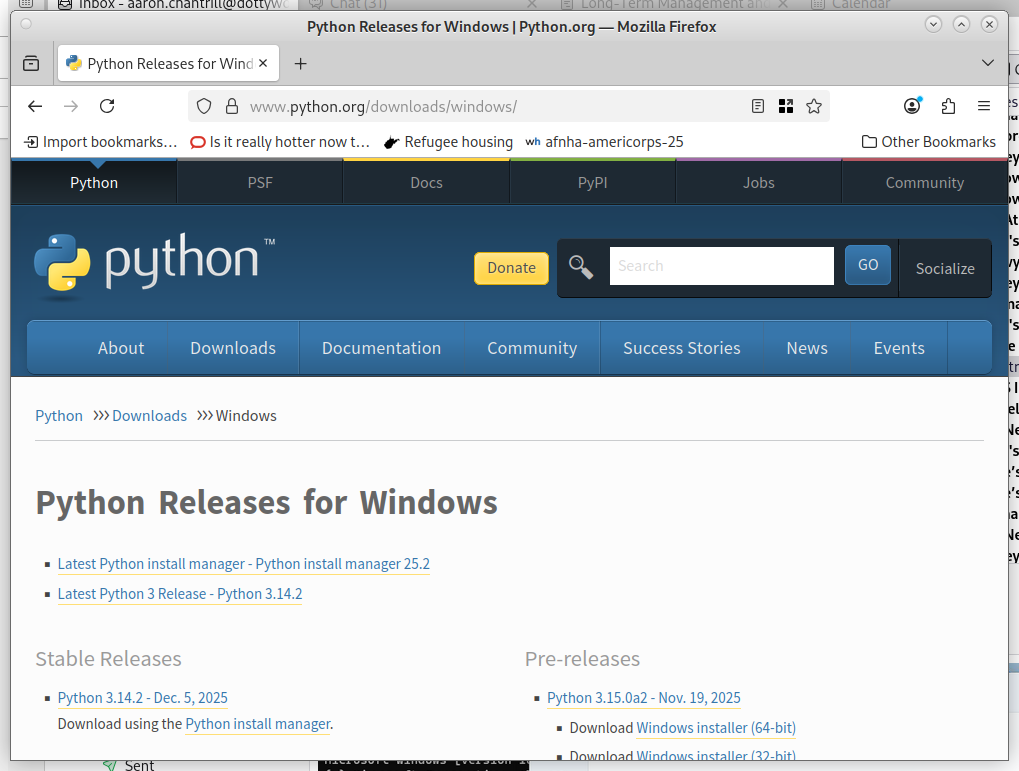
* uv
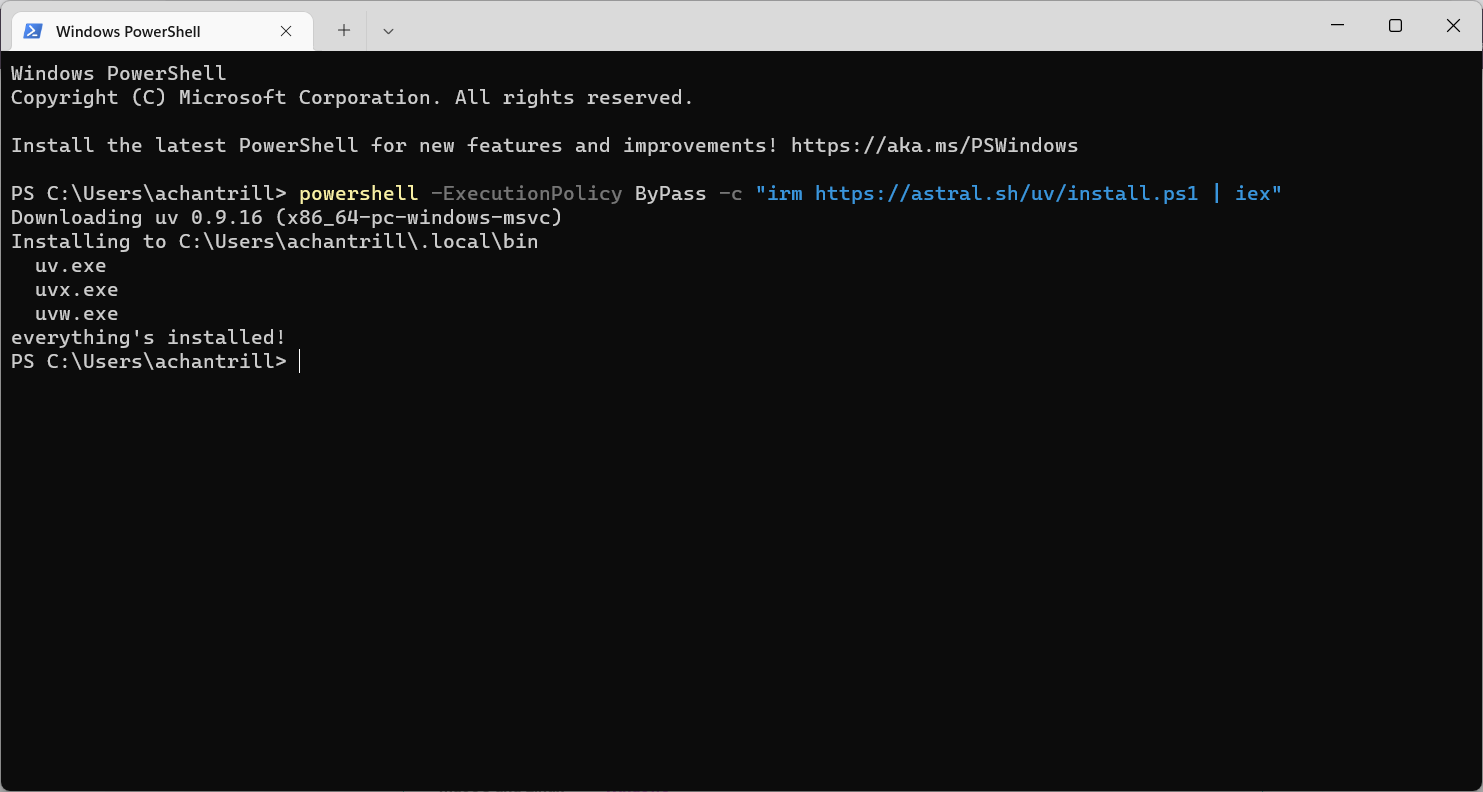
* Anaconda/Miniconda
https://www.anaconda.com/docs/getting-started/anaconda/install
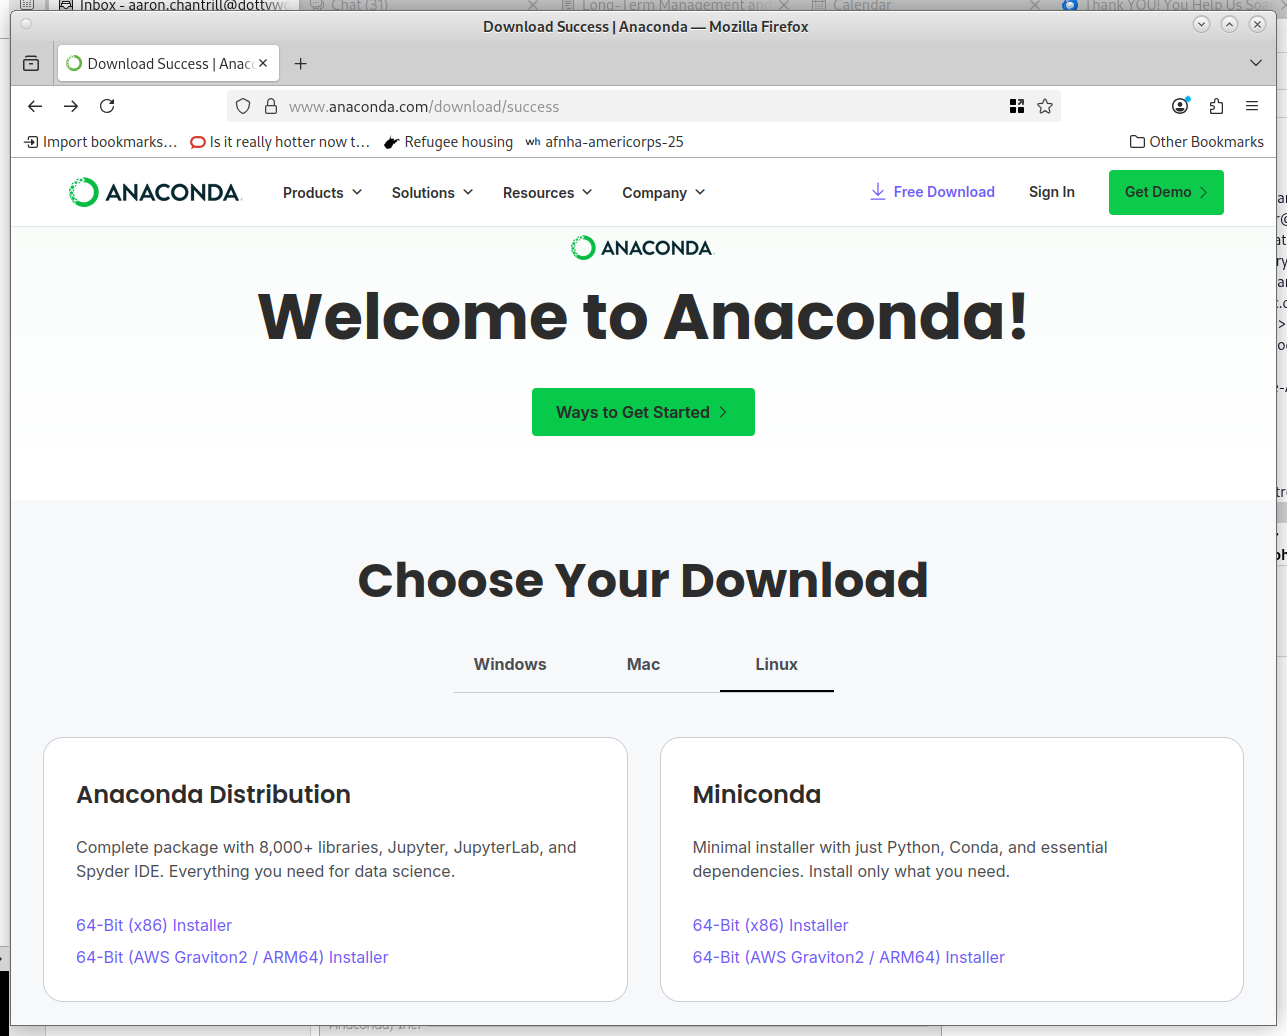
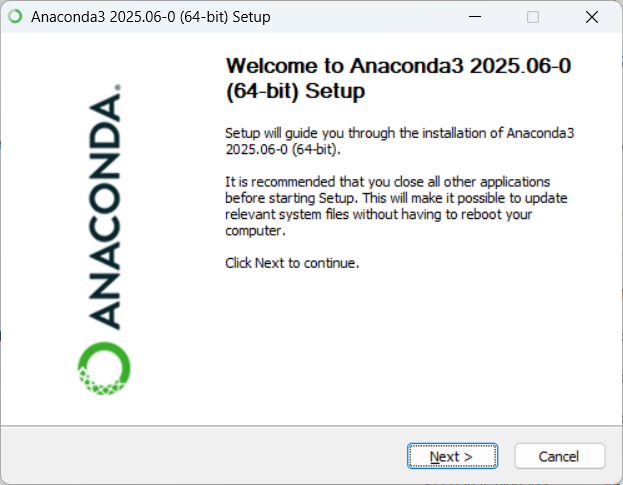
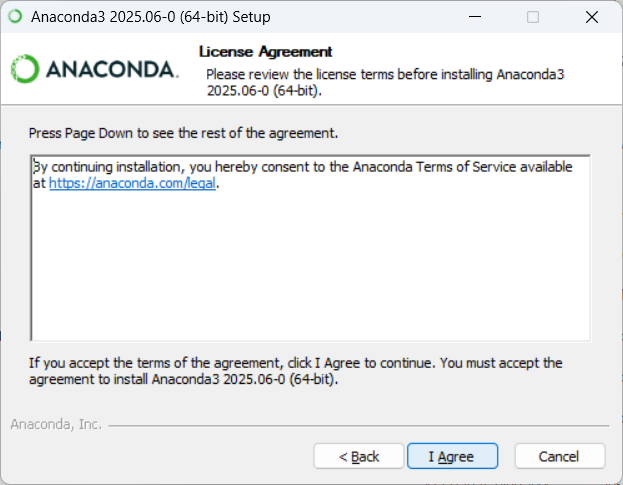
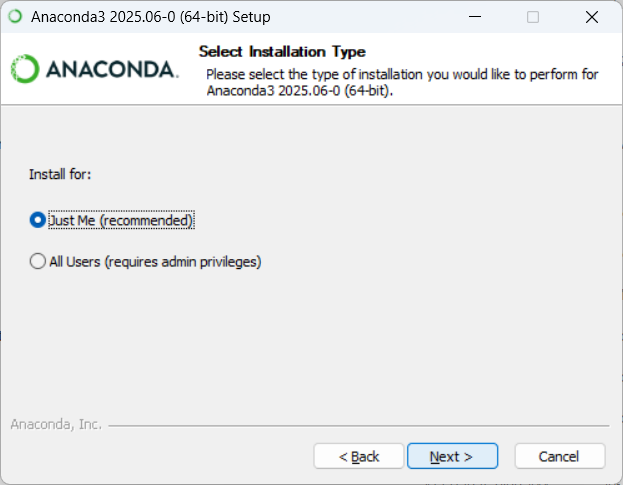
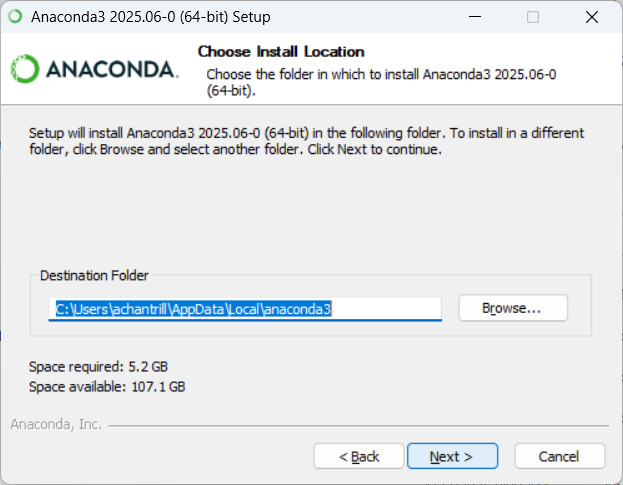

### OSX
* brew
https://mac.install.guide/python/brew
* Download from Python.org
https://www.python.org/downloads/macos/

### Linux
* Package manager
  - apt
  - yum
  - zypper
  - pacman

## Virtual Environments

Virtual environments in Python allow you to keep discrete python installations so that packages installed for one program do not
affect another program. You can even keep multiple versions of Python on the same system. Any packages installed while using a virtual environment are only installed for that environment.

In *nix systems, it is common to reference #!/bin/env python3 rather than #!/usr/bin/python directly in the first line of scripts.

There are multiple ways to create a virtual environment.
* python -m venv EnvironmentName
* python -m virtualenv EnvironmentName
* uv venv EnvironmentName
* conda create -n EnvironmentName

Venv is a standard library in Python, so it is the easiest to use since it does not require any additional software, and this is the method most people use, although uv seems to be gaining some ground.

`python -m venv TechExpress`

To activate the environment, in Windows use:

`TechExpress\Scripts\activate`

in Linux or OSX, use

`source TechExpress/bin/activate`


## Jupyter Notebook

Jupyter notebook provides an interactive, browser-based environment for testing and experimenting with code.

Install it using pip, which is the standard method for installing packages in python.

`pip install jupyter notebook`

run it by typing

`jupyter notebook`

Once jupyter notebook is running, it will attempt to load its index page into your default web browser, at http://localhost:8888/tree

## Organizing Python code

* __Module__: Related code in a file with a .py extension
* __Package__: a collection of Modules in a directory with an \_\_init\_\_.py file


In [ ]:
# https://www.idtech.com/blog/easy-games-to-make-in-python
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 9)

def check_winner(board, player):
    for row in board:
        if all(s == player for s in row):
            return True

    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True

    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True

    return False

board = [[" " for _ in range(3)] for _ in range(3)]
player = "X"

for _ in range(9):
    print_board(board)
    row, col = map(int, input(f"Player {player}, enter row and column (0-2): ").split())

    if board[row][col] == " ":
        board[row][col] = player
        if check_winner(board, player):
            print_board(board)
            print(f"Player {player} wins!")
            break
        player = "O" if player == "X" else "X"
    else:
        print("Invalid move! Try again.")

else:
    print("It's a tie!")

## Introducing objects
Objects maintain an internal state. A class is used to instantiate an object. Python classes have some "magic" methods which are surrounded by double underscores. These are called "dunder" methods. The "\_\_init\_\_" dunder method is the one you are most likely to encounter. It is used to initialize a new object, and parameters passed to the class as the object is being created are passed directly to it. Notice the "self" parameter that is passed automatically as the first parameter to methods.

## Introducing type hints
Type hints are used to document the types of parameters a method expects to receive, and also the type of the return value. They can also be used to indicate the types of variables within methods, although there are restrictions. Python is a loosely typed language, so you can change the type of a variable at any time. This can be very confusing for someone trying to read your code later.

## Introducing docstrings
Docstrings are string literals used for documentation. They are placed directly below the declaration statement of a class, function or method and are surrounded by triple double quotes

In [ ]:
class Integer:
    def __init__(self, value: int) -> None:
        """
        This method initializes the object by setting the initial value.
        """
        self.value: int = value

    def __str__(self) -> str:
        """
        This method defines how the object should appear when printed.
        """
        return str(self.value)

    def add(self, operand: int) -> None:
        """
        This method extends the functionality of the object by allowing a new integer to be added to its current value.
        """
        self.value += operand

    def subtract(self, operand: int) -> None:
        """
        This method extends the functionality of the object by allowing a new integer to be subtracted from the current value.
        """
        self.value -= operand

i = Integer(0)
print(i)
i.add(5)
print(i)
i.subtract(4)
print(i)
help(Integer)

In [ ]:
# Tic Tac Toe
class Board:
    def __init__(self) -> None:
        """
        This initializes the board with empty cells and sets the first player to 'X'
        """
        self.height: int
        self.width: int
        self.height = self.width = 3
        self.status: list[list[str]] = [[" " for _ in range(self.width)] for _ in range(self.height)]
        self.turn: str = 'X'

    def __str__(self) -> str:
        """
        This is how the board is displayed when printed
        """
        response: str = "\n"
        for row_index, row in enumerate(self.status):
            if row_index > 0:
                response = f"{response}\n{'-' * (self.width * 2 - 1)}\n"
            for cell_index, cell in enumerate(row):
                if cell_index > 0:
                    response = f"{response}|"
                response = f"{response}{cell}"
        return response

    def check_winner(self) -> bool:
        """
        Check if a player has won the game by completing a row, column, or diagonal
        """
        # Check if a player has completed a whole row
        for row in self.status:
            if all(cell == self.turn for cell in row):
                return True
        # Check if a player has completed a whole column
        for col_index in range(self.height):
            if all(self.status[row_index][col_index] == self.turn for row_index in range(self.width)):
                return True
        # Check if a player has completed a whole diagonal from top left to bottom right
        if all(self.status[i][i] == self.turn for i in range(self.height)):
            return True
        # Check if a player has completed a whole diagonal from bottom left to top right
        if all(self.status[i][len(self.status)-1-i] == self.turn for i in range(self.height)):
            return True
        else:
            return False

    def check_full(self) -> bool:
        """
        Check to see if all spaces are filled and the game is over
        """
        if all(self.status[row_index][col_index] != " " for row_index in range(self.height) for col_index in range(self.width)):
            return True
        return False

def play_game() -> str:
    board: Board = Board()
    print("Welcome to Tic-Tac-Toe")
    # Print the empty board
    print(board)
    while not board.check_full():
        try:
            row: int
            col: int
            row, col = map(int, input(f"Player {board.turn}, enter row and column (0-{board.height - 1} 0-{board.width - 1}):").split())
            assert row < board.height
            assert col < board.width
            if board.status[row][col] == " ":
                board.status[row][col] = board.turn
                print(board)
                if board.check_winner():
                    return f"Player {board.turn} wins!"
                board.turn = "O" if board.turn == "X" else "X"
            else:
                print("Invalid move, try again")
        except (ValueError, IndexError, AssertionError):
            print("Invalid input, try again")
    else:
        return "The game ended with a stalemate."

print(play_game())

## Introducing some code checkers
* mypy - a static type checker
* flake8 - used to check for various formatting issues
* nbqa - hides everything that isn't your code in a notebook, allowing code-checking tools to be used on it

In [ ]:
!pip install nbqa mypy flake8

In [ ]:
!nbqa mypy TicTacToe.ipynb

In [ ]:
!nbqa flake8 TicTacToe.ipynb

In [ ]:
import sys
sys.version

In [ ]:
help(Board)